<a href="https://colab.research.google.com/github/wordsbyanmol/Machine-Learning-Course/blob/main/Mlpp24_finalterm_anmol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **GGD: Total = 41 / 50**

<b>

Introduction, Data Description, and Statistics : 8

Visualizations : 8


Machine Learning Results : 8


Conclusions and Narrative : 7

Presentation : 10

Good work overall!  Here are some comments.  Column names still missing in Data Description.  Some axis labels were not appropriately labeled as "standardized".  The narrative did not discuss the class imbalance, the ~90% accuracy from your tree-based methods might have been due to this very high class imbalance.  For the time series section, `StandardScalar` performs standardization across objects, not rows, and so the trends across years will be lost.  Lastly, the overall Conclusions are missing.



---
---

<big>***GGD: PLEASE EDIT THIS NOTEBOOK DIRECTLY AND DO <u>NOT</u> MAKE A COPY***</big> <br><br>

# **MLPP24 // MIDTERM: Preference & priorities in Hazard Mitigation**

<big>Anmol Arora</big>

<i>Mar 22, 2024</i>

---
---

### **Introduction**

TEXT that **must** include references setting up the background for the Problem Statement.  Roughly 500 words, followed by,

***Problem Statement: Your Problem Definition stated succienctly but clearly and unambiguously.***

There were 4,848 presidential disaster declarations between 1954-2024 in the United States (i). It has confronted 377 weather/climate disaster events with losses exceeding $1 billion each between 1980-2024 (ii). At least 2,29,000 homes have been damaged by floods in the past two decades (iii). Furthermore, a total of 14.6 million properties are at a substantial risk and the number is estimated to rise to 16.2 million by 2050 (ibid). The Federal Emergency Management Agency’s (FEMA) is the nodal government agency that works towards hazard mitigation to reduce or eliminate long-term risk to people and property from future disasters. FEMA hazard mitigation assistance provides funding for eligible mitigation measures that reduce disaster losses. The key programmes include:

1. Hazard Mitigation Grant Program,
2. Flood Mitigation Assistance,
3. Building Resilient Infrastructure and Communities.

These programmes span different disaster categories, states, counties, property types, and structure types over multiple decades. The public information on allocation and division across these categories is limited. We need better analysis on how increase in frequency and the intensity of disasters will impact hazard mitigation activities. This analysis will engage with these questions and use machine learning algorithms to shed light on the issues.

i: FEMA: https://www.fema.gov/disaster/declarations
ii: National Centers for Environmental Information: https://www.ncei.noaa.gov/access/billions/state-summary/US
iii: A.R. Siders et al., Floodplain buyouts: Challenges, practices, and lessons learned in Newark, Delaware. https://www.nature.org/content/dam/tnc/nature/en/documents/Buyouts_Lessons_Learned_Siders_Gerber_Chavez_TNC_Full_Report_2021.pdf.

***Problem Statement:  

This analysis will use FEMA's hazard-mitigated properties time-series dataset as well as the disaster declaration dataset to explore spatiotemporal patterns and preferences of disaster mitigation across the United States. It will also evaluate the extent to which these are predictive of future trends using machine learning. </small>***

---

### **Data Description**

A description of the datasets that you will use to address your Problem Statement.  This description **MUST** includes links to the data and for **each** data set should include:

- The two dataset under consideration are:
1.Hazard Mitigation Assistance Mitigated Properties-v3: https://www.fema.gov/openfema-data-page/hazard-mitigation-assistance-mitigated-properties-v3
2. Dataset: Disaster Declaration Summaries – v2:  https://www.fema.gov/openfema-data-page/disaster-declarations-summaries-v2


The Hazard Mitigation Assistance Mitigated Properties dataset is owned by FEMA and made publicly available on their website.  The dataset contains mitigated property information from FEMA’s mitigation grant systems and is subject to a small percentage of human error. The dataset contains properties by project identifier, city, zip code, county, state and region and does not contain any Personally Identifiable Information (PII).

The Disaster Declaration dataset is a summarized dataset describing all federally declared disasters. This dataset lists all official FEMA Disaster Declarations, beginning with the first disaster declaration in 1953 and features all three disaster declaration types: major disaster, emergency, and fire management assistance. .  

Time range and/or spatial range that the data covers 1996-2024 and is spatially diasggrgated across, county, state, state and region.

The data contains records of properties mitigated under the Hazard Mitigation Assistance grant programme run by FEMA. It's disaggregated across county, state, region and years.


---

### **Summary Statistics and Visualizations**

Summary statistics and visualizations for relevant features in each data set above.  ***Every plot MUST include a caption describing what is being plotted and why it is interesting/relevant.***  Text in this section should discuss any unexpected values, outliers, comments on the distributions of the data, missing data, *etc*.  ***If there is missing data, discuss how you will treat it and why that is reasonable.***

In [ ]:
#load file
fname= "https://www.fema.gov/api/open/v3/HazardMitigationAssistanceMitigatedProperties.csv"
dname= "/content/drive/MyDrive/Machine Learning_Anmol/Datasets/Disaster_Declaration/DisasterDeclarationsSummaries.csv"

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#import libraries for analysis
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import geopandas as gpd
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import graphviz

In [ ]:
#setting plot defaults
plt.style.use("bmh")
px.defaults.width= 800
px.defaults.template= "ggplot2"


In [ ]:
#name dataframe
mitigation=pd.read_csv (fname)
mitigationcopy= mitigation
mitigation

,projectIdentifier,programArea,programFy,disasterNumber,propertyAction,structureType,typeOfResidency,foundationType,county,city,state,stateNumberCode,region,zip,damageCategory,actualAmountPaid,numberOfProperties,id
0,DR-1354-0005-R,HMGP,2001,1354.0,Safe Room/Wind Shelter,Single Family,NaN,Other (Specify in Comments),Saline,BENTON,Arkansas,5.0,6.0,07201,NaN,NaN,16,8daff339-bbc4-4dac-8f49-46b46e1dfaf4
1,DR-1428-0002-R,HMGP,2002,1428.0,Acquisition/Demolition,Single Family,Owner Occupied - Principal Residence,Crawl Space,Caledonia,LYNDONVILLE,Vermont,50.0,1.0,05851,50 - 99%,37058.0,1,48ddf3d9-d66e-43aa-9f22-68b6d2621574
2,DR-1292-0057-R,HMGP,1999,1292.0,Acquisition/Demolition,Single Family,Rental,Crawl Space,Pender,BURGAW,North Carolina,37.0,4.0,28425,0 - 49%,167500.0,1,bd71e943-0609-442f-9a2a-9aaa3be7900b
3,DR-1983-0008-R,HMGP,2011,1983.0,Acquisition/Demolition,Single Family,Owner Occupied - Principal Residence,Slab on Grade,Washington,GREENVILLE,Mississippi,28.0,4.0,38703,50 - 99%,500.0,1,069dbdb8-8953-4c9b-b0ab-75b047e93d53
4,DR-4030-0013-R,HMGP,2011,4030.0,Acquisition/Demolition,Single Family,Owner Occupied - Principal Residence,Crawl Space,Columbia,BLOOMSBURG,Pennsylvania,42.0,3.0,17815,50 - 99%,93000.0,1,91b8eb65-02e1-48ac-a286-45051bd06412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71726,DR-1120-0011-R,HMGP,1996,1120.0,Acquisition/Demolition,NaN,NaN,NaN,Bedford,HYNDMAN BOROUGH,Pennsylvania,42.0,3.0,15545,NaN,NaN,1,b4f50f73-8d81-49bd-b684-2b59668bc5d9
71727,DR-0997-0018-R,HMGP,1993,997.0,Acquisition of Vacant Land,NaN,NaN,NaN,Calhoun,KAMPSVILLE,Illinois,17.0,5.0,62053,NaN,NaN,1,1c1662cc-d295-4b46-b184-24706fe6dab9
71728,DR-1033-0014-R,HMGP,1994,1033.0,Acquisition of Vacant Land,NaN,NaN,NaN,Bibb,MACON,Georgia,13.0,4.0,31206,50 - 99%,NaN,1,1180ed21-1b0e-4996-85fd-f2f573c0aed1
71729,DR-1182-0001-R,HMGP,1997,1182.0,Acquisition/Relocation,NaN,NaN,NaN,Snohomish,SULTAN,Washington,53.0,10.0,98294,NaN,NaN,1,3b0be0ca-de84-415e-a571-dad975e6b3d1


Sequentially assigned number used to designate an event or incident declared as a disaster. Note, some older non-disaster projects will report a disaster number due to the system of record used at the time. For more information on the disaster process, please visit https://www.fema.gov/disasters/how-declared

In [ ]:
#features of the data
mitigation.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71731 entries, 0 to 71730
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   projectIdentifier   71731 non-null  object 
 1   programArea         71731 non-null  object 
 2   programFy           71731 non-null  int64  
 3   disasterNumber      65711 non-null  float64
 4   propertyAction      68126 non-null  object 
 5   structureType       66218 non-null  object 
 6   typeOfResidency     45707 non-null  object 
 7   foundationType      64927 non-null  object 
 8   county              70665 non-null  object 
 9   city                71729 non-null  object 
 10  state               71707 non-null  object 
 11  stateNumberCode     71707 non-null  float64
 12  region              71707 non-null  float64
 13  zip                 71723 non-null  object 
 14  damageCategory      25211 non-null  object 
 15  actualAmountPaid    47193 non-null  float64
 16  numb

In [ ]:
unique_values = mitigation['programFy'].unique()
print(unique_values)

[2001 2002 1999 2011 2005 2004 2010 2000 2009 2003 2007 2008 2006 2015
 1998 2017 2016 2014 2021 2019 2020 2013 2018 2012 1994 1993 1990 2022
 1997 1992 1991 1996 1995 1989 2023]


In [ ]:
#fraction of propertyactions
propertyAction_count = mitigation["propertyAction"].value_counts()
propertyAction_count

propertyAction
Acquisition/Demolition              22154
Wind Retrofit                       17916
Safe Room/Wind Shelter              16996
Elevation                            5280
Seismic Retrofit                     2376
Other (Specify in Comments)           999
Acquisition of Vacant Land            983
Wildfire Retrofit                     433
Acquisition/Relocation                389
Floodproofed                          321
Mitigation Reconstruction             241
Wind Retrofit Advanced(A-P804)         28
Wind Retrofit Basic (B-P804)            6
Retro (1/15/2008 - DSG)                 2
Wind Retrofit Estimated(ES-P804)        2
Name: count, dtype: int64

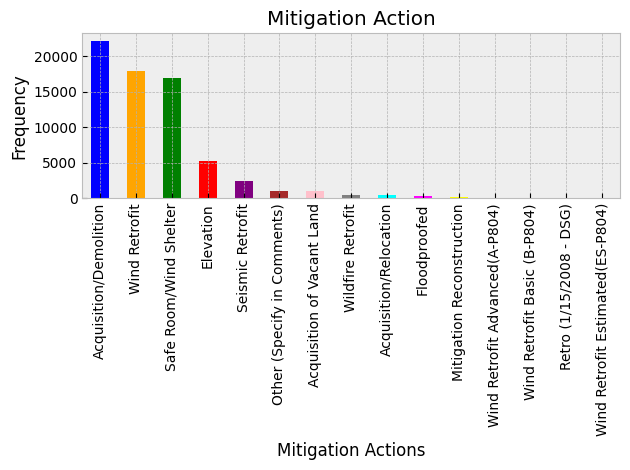

In [ ]:
# Create a bar chart of Property Action
labels = propertyAction_count.index
values = propertyAction_count.values

# Define colors for each bar (you can customize this list)
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'cyan', 'magenta', 'yellow', 'teal', 'lavender', 'lightblue', 'lightgreen']

# Create a bar chart with custom colors
propertyAction_count.plot(kind='bar', color=colors)

# Customize the plot if needed (e.g., adding labels and title)
plt.xlabel('Mitigation Actions')
plt.ylabel('Frequency')
plt.title('Mitigation Action')

# Show the plot
plt.tight_layout()
plt.show()

This bar chart plots the total count of each property mitigation action undertaken through FEMA grant. It shows us that the most widely funded mitigtaion actions are: Acquisition/Demolition, Wind Retrofit and Safe Room/Wind Shelter. Menawhile, some of the least funded actions are wind retrofit and mitigtaion reconstruction.

In [ ]:
# Standardize values using z-score normalization
propertyAction_std = (propertyAction_count - propertyAction_count.mean()) / propertyAction_count.std()

# Display the standardized values
print(propertyAction_std)

propertyAction
Acquisition/Demolition              2.291223
Wind Retrofit                       1.739891
Safe Room/Wind Shelter              1.620206
Elevation                           0.096043
Seismic Retrofit                   -0.281746
Other (Specify in Comments)        -0.460883
Acquisition of Vacant Land         -0.462964
Wildfire Retrofit                  -0.534515
Acquisition/Relocation             -0.540239
Floodproofed                       -0.549086
Mitigation Reconstruction          -0.559493
Wind Retrofit Advanced(A-P804)     -0.587203
Wind Retrofit Basic (B-P804)       -0.590065
Retro (1/15/2008 - DSG)            -0.590585
Wind Retrofit Estimated(ES-P804)   -0.590585
Name: count, dtype: float64


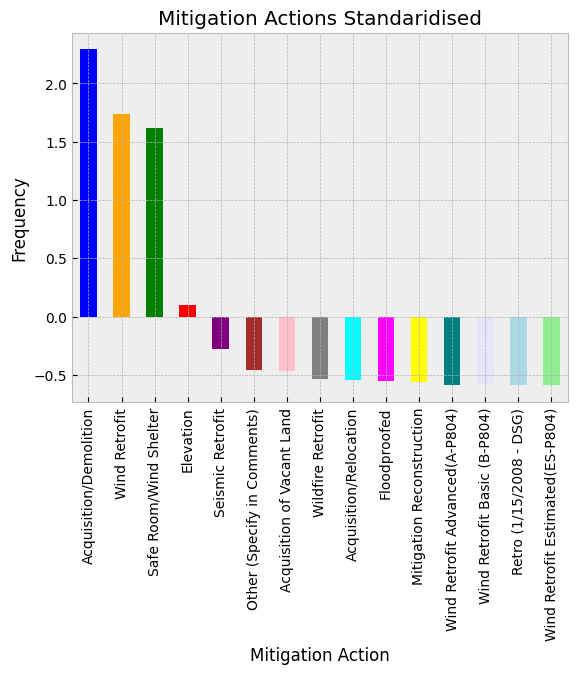

In [ ]:
# Create a bar chart
labels = propertyAction_std.index
values = propertyAction_std.values

# Define colors for each bar (you can customize this list)
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'cyan', 'magenta', 'yellow', 'teal', 'lavender', 'lightblue', 'lightgreen']

# Create a bar chart with custom colors
propertyAction_std.plot(kind='bar', color=colors)

# Customize the plot if needed (e.g., adding labels and title)
plt.xlabel('Mitigation Action')
plt.ylabel('Frequency')
plt.title('Mitigation Actions Standaridised')

# Show the plot
plt.show()

I have standardised the data for meaningful comparisons between different variables and visualisation. This bar chart plots the total count of each property mitigation action undertaken through FEMA grant. It shows us that the most widely used mitigtaion actions are: Acquisition/Demolition, Wind Retrofit and Safe Room/Wind Shelter. Menawhile, some of the least funded actions are wind retrofit and mitigtaion reconstruction.

In [ ]:
mitigation

,projectIdentifier,programArea,programFy,disasterNumber,propertyAction,structureType,typeOfResidency,foundationType,county,city,state,stateNumberCode,region,zip,damageCategory,actualAmountPaid,numberOfProperties,id
0,DR-1354-0005-R,HMGP,2001,1354.0,Safe Room/Wind Shelter,Single Family,NaN,Other (Specify in Comments),Saline,BENTON,Arkansas,5.0,6.0,07201,NaN,NaN,16,8daff339-bbc4-4dac-8f49-46b46e1dfaf4
1,DR-1428-0002-R,HMGP,2002,1428.0,Acquisition/Demolition,Single Family,Owner Occupied - Principal Residence,Crawl Space,Caledonia,LYNDONVILLE,Vermont,50.0,1.0,05851,50 - 99%,37058.0,1,48ddf3d9-d66e-43aa-9f22-68b6d2621574
2,DR-1292-0057-R,HMGP,1999,1292.0,Acquisition/Demolition,Single Family,Rental,Crawl Space,Pender,BURGAW,North Carolina,37.0,4.0,28425,0 - 49%,167500.0,1,bd71e943-0609-442f-9a2a-9aaa3be7900b
3,DR-1983-0008-R,HMGP,2011,1983.0,Acquisition/Demolition,Single Family,Owner Occupied - Principal Residence,Slab on Grade,Washington,GREENVILLE,Mississippi,28.0,4.0,38703,50 - 99%,500.0,1,069dbdb8-8953-4c9b-b0ab-75b047e93d53
4,DR-4030-0013-R,HMGP,2011,4030.0,Acquisition/Demolition,Single Family,Owner Occupied - Principal Residence,Crawl Space,Columbia,BLOOMSBURG,Pennsylvania,42.0,3.0,17815,50 - 99%,93000.0,1,91b8eb65-02e1-48ac-a286-45051bd06412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71726,DR-1120-0011-R,HMGP,1996,1120.0,Acquisition/Demolition,NaN,NaN,NaN,Bedford,HYNDMAN BOROUGH,Pennsylvania,42.0,3.0,15545,NaN,NaN,1,b4f50f73-8d81-49bd-b684-2b59668bc5d9
71727,DR-0997-0018-R,HMGP,1993,997.0,Acquisition of Vacant Land,NaN,NaN,NaN,Calhoun,KAMPSVILLE,Illinois,17.0,5.0,62053,NaN,NaN,1,1c1662cc-d295-4b46-b184-24706fe6dab9
71728,DR-1033-0014-R,HMGP,1994,1033.0,Acquisition of Vacant Land,NaN,NaN,NaN,Bibb,MACON,Georgia,13.0,4.0,31206,50 - 99%,NaN,1,1180ed21-1b0e-4996-85fd-f2f573c0aed1
71729,DR-1182-0001-R,HMGP,1997,1182.0,Acquisition/Relocation,NaN,NaN,NaN,Snohomish,SULTAN,Washington,53.0,10.0,98294,NaN,NaN,1,3b0be0ca-de84-415e-a571-dad975e6b3d1


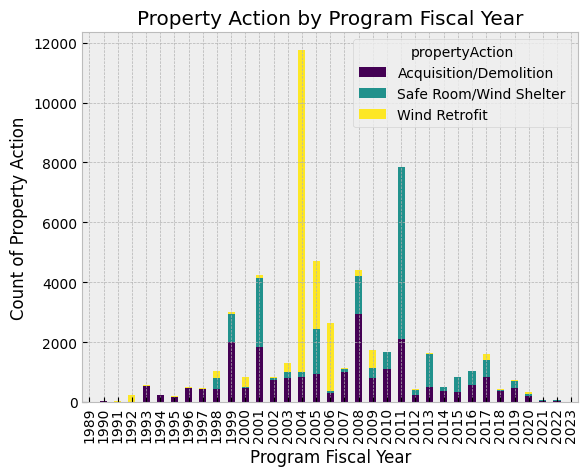

In [ ]:
# Sample DataFrame
data = {
    'programFy': ['2011', '2005', '2010', '2004', '1997', '1999', '1998', '2000', '2001', '2003', '2009', '1996', '1993', '1994',
                  '2007', '2008', '2002', '1990', '1995', '1992', '2006', '1991', '2018', '2019', '2013', '2016', '2017', '2012',
                  '2020', '2015', '2022', '2023', '2014', '1989', '2021'],
    'propertyAction': ['Acquisition/Demolition', 'Wind Retrofit', 'Safe Room/Wind Shelter'],
}

# Filter DataFrame to include only the specified property actions
property_Action = ['Acquisition/Demolition', 'Wind Retrofit', 'Safe Room/Wind Shelter']
mitigation_filtered = mitigation[mitigation['propertyAction'].isin(property_Action)]

# Count the occurrences of each combination of 'programFy' and 'propertyAction'
count_df = mitigation_filtered.groupby(['programFy', 'propertyAction']).size().unstack(fill_value=0)

# Plot the bar chart
count_df.plot(kind='bar', stacked=True, colormap='viridis')

# Customize the plot
plt.xlabel('Program Fiscal Year')
plt.ylabel('Count of Property Action')
plt.title('Property Action by Program Fiscal Year')

# Show the plot
plt.show()

The plotted bar chart compares the distribution of the top three most widely funded property actions: 'Acquisition/Demolition', 'Wind Retrofit', and 'Safe Room/Wind Shelter' by FEMA across different program fiscal years. The domination of Acquisition/Demolition across decades is noteworthy. What also strikes is that wind retrofit spikes extensively in 2004-2006 but since then has become marginalised. We can also see that the use of safe room/wind shelter is consisten over the past two decades.

In [ ]:
# Specify the state you want to select
desired_state = 'North Carolina'

# Use boolean indexing to select rows for the desired state
north_carolina_data = mitigation[mitigation['state'] == desired_state]

# Print the new DataFrame
print(north_carolina_data)
north_carolina_data.head (2)

         projectIdentifier programArea  programFy  disasterNumber  \
2           DR-1292-0057-R        HMGP       1999          1292.0   
15          DR-1292-0002-R        HMGP       1999          1292.0   
202         DR-4019-0023-R        HMGP       2011          4019.0   
256         DR-1292-0024-R        HMGP       1999          1292.0   
274         DR-1448-0079-R        HMGP       2003          1448.0   
...                    ...         ...        ...             ...   
71587       DR-4285-0030-R        HMGP       2017          4285.0   
71595       DR-4285-0042-R        HMGP       2017          4285.0   
71620  FMA-PJ-04NC-1998004         FMA       1998             NaN   
71642       DR-4285-0054-R        HMGP       2017          4285.0   
71659  FMA-PJ-04NC-2002007         FMA       2002             NaN   

               propertyAction      structureType  \
2      Acquisition/Demolition      Single Family   
15     Acquisition/Demolition      Single Family   
202            

,projectIdentifier,programArea,programFy,disasterNumber,propertyAction,structureType,typeOfResidency,foundationType,county,city,state,stateNumberCode,region,zip,damageCategory,actualAmountPaid,numberOfProperties,id
2,DR-1292-0057-R,HMGP,1999,1292.0,Acquisition/Demolition,Single Family,Rental,Crawl Space,Pender,BURGAW,North Carolina,37.0,4.0,28425,0 - 49%,167500.0,1,bd71e943-0609-442f-9a2a-9aaa3be7900b
15,DR-1292-0002-R,HMGP,1999,1292.0,Acquisition/Demolition,Single Family,Rental,Crawl Space,Lenoir,KINSTON,North Carolina,37.0,4.0,28501,50 - 99%,20000.0,1,355068b7-3399-45f4-9129-82d56de1e31e


In [ ]:
#fraction of propertyactions
propertyAction_count_nc = north_carolina_data["propertyAction"].value_counts()
propertyAction_count_nc

propertyAction
Acquisition/Demolition         2024
Elevation                       447
Acquisition/Relocation           79
Mitigation Reconstruction        40
Acquisition of Vacant Land       32
Other (Specify in Comments)      16
Wind Retrofit                     5
Floodproofed                      1
Name: count, dtype: int64

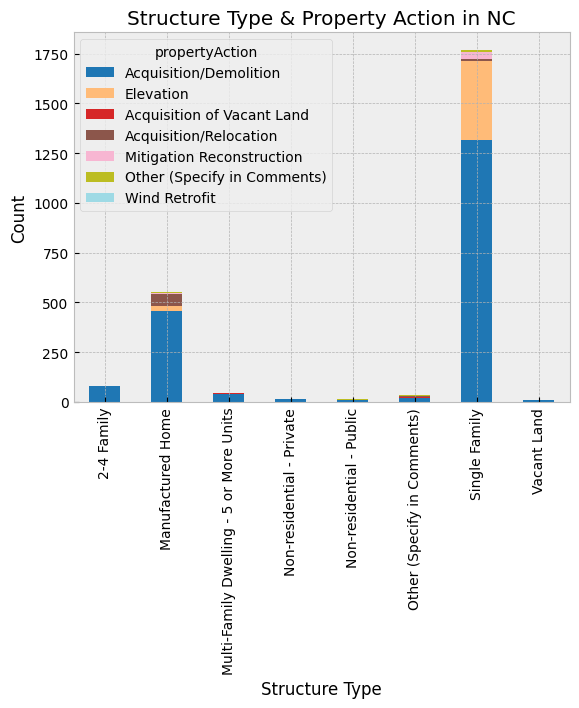

In [ ]:
# Sample DataFrame for North Carolina
data = {
    'structureType': ['Single Family', 'Manufactured Home', 'Multi-Family', 'Single Family', 'Multi-Family'],
    'propertyAction': ['Acquisition/Demolition', 'Elevation', 'Acquisition/Relocation', 'Mitigation Reconstruction', 'Other (Specify in Comments)',
                       'Acquisition of Vacant Land', 'Floodproofed', 'Wind Retrofit'],
}
# Count the occurrences of each combination of 'structureType' and 'propertyAction'
count_df = north_carolina_data.groupby(['structureType', 'propertyAction']).size().unstack(fill_value=0)

# Plot the bar chart
count_df.plot(kind='bar', stacked=True, colormap='tab20')

# Customize the plot
plt.xlabel('Structure Type')
plt.ylabel('Count')
plt.title('Structure Type & Property Action in NC')

# Show the plot
plt.show()

This bar chart cross-compares StructureType and Mitigation Action in North Carolina. It shows us that Acquisition/Demolition is by far the most funded property Mitigation action for Single Family and Manufactured Homes in North Carolina. Elevation is another mitigation measure that is funded while the others are negligible.  

In [ ]:
# Create a new DataFrame with 'actualAmountPaid', state and 'programFy' columns
mitigation_year = mitigation[['actualAmountPaid', 'state', 'programFy']]

<!-- The pie chart displays the percentage distribution of 'actualAmountPaid' across different states, focusing only on states where the contribution is 5% or more of the total sum of 'actualAmountPaid' across all states. From the pie chart, we observe that Missouri (20%), Washington (13.2%), and Mississippi (11.6%) collectively account for almost half of FEMA mitigtation aid. -->

In [ ]:
# Group data by 'programFy' and calculate the sum of 'actualAmountPaid' for each 'programFy'
north_carolina_data.loc[:, 'totalAmountPaid'] = north_carolina_data.groupby('programFy')['actualAmountPaid'].transform('sum')

<ipython-input-127-45179d8160c5>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
north_carolina_data

,projectIdentifier,programArea,programFy,disasterNumber,propertyAction,structureType,typeOfResidency,foundationType,county,city,state,stateNumberCode,region,zip,damageCategory,actualAmountPaid,numberOfProperties,id,totalAmountPaid
2,DR-1292-0057-R,HMGP,1999,1292.0,Acquisition/Demolition,Single Family,Rental,Crawl Space,Pender,BURGAW,North Carolina,37.0,4.0,28425,0 - 49%,167500.0,1,bd71e943-0609-442f-9a2a-9aaa3be7900b,857007369.0
15,DR-1292-0002-R,HMGP,1999,1292.0,Acquisition/Demolition,Single Family,Rental,Crawl Space,Lenoir,KINSTON,North Carolina,37.0,4.0,28501,50 - 99%,20000.0,1,355068b7-3399-45f4-9129-82d56de1e31e,857007369.0
202,DR-4019-0023-R,HMGP,2011,4019.0,Elevation,Single Family,Owner Occupied - Principal Residence,Crawl Space,Haywood,CANTON,North Carolina,37.0,4.0,28716,0 - 49%,54675.0,1,3a7a6d27-b028-4029-bb60-6b3cb1cf2a23,12512063.0
256,DR-1292-0024-R,HMGP,1999,1292.0,Acquisition/Demolition,Single Family,Rental,Crawl Space,Edgecombe,BATTLEBORO,North Carolina,37.0,4.0,27809,50 - 99%,71216.0,1,bb7d9c86-348f-4e92-ba11-43388a5df04f,857007369.0
274,DR-1448-0079-R,HMGP,2003,1448.0,Elevation,Single Family,Owner Occupied - Principal Residence,Slab on Grade,Beaufort,BELHAVEN,North Carolina,37.0,4.0,27810,0 - 49%,NaN,1,ecdf5d4c-18af-48de-8e4e-89b4dee2c637,10734466.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71587,DR-4285-0030-R,HMGP,2017,4285.0,Elevation,Manufactured Home,Rental,Crawl Space,Edgecombe,PINETOPS,North Carolina,37.0,4.0,27864,0 - 49%,NaN,1,870fd3ae-bd65-4f22-88e3-fda9fb00cdf5,8952344.0
71595,DR-4285-0042-R,HMGP,2017,4285.0,Acquisition/Demolition,Single Family,Owner Occupied - Principal Residence,Crawl Space,NaN,FAIR BLUFF,North Carolina,37.0,4.0,27439,50 - 99%,NaN,1,e971f6ee-fcae-4848-ba85-b8e66c7acf3b,8952344.0
71620,FMA-PJ-04NC-1998004,FMA,1998,NaN,Acquisition/Demolition,Single Family,Primary,Slab on Grade,McDowell,CHARLOTTE,North Carolina,37.0,4.0,28209,NaN,NaN,1,5b8037b9-e48c-48cd-afa6-cb9f7e658a84,0.0
71642,DR-4285-0054-R,HMGP,2017,4285.0,NaN,Single Family,Owner Occupied - Principal Residence,Crawl Space,Robeson,LUMBERTON,North Carolina,37.0,4.0,28358,50 - 99%,NaN,1,9e4cf4eb-ed32-44ac-a0ae-fcdd68df7f1f,8952344.0


In [ ]:
# Plot 'totalAmountPaid' vs 'programFy' for North Carolina
fig = px.scatter(north_carolina_data, x='programFy', y='totalAmountPaid',
                 title='Actual Amount Paid vs Program Fiscal Year in North Carolina',
                 labels={'programFy': 'Program Fiscal Year', 'totalAmountPaid': 'Actual Amount Paid'})

# Show the plot
fig.show()

The dot in 1999 showing assistance in tune of 880 million dollars is in response to Hurricane Floyd. FEMA gave massive assistance that included home acquisitions.

This scatter plot shows how North Carolina has consistently received mitigation aid between 78k - 3million dollars since 1996. However, 0.8 billion dollars was provided in response to Hurricane Floyd beginning on August 29, 1999.

Link: https://www.fema.gov/disaster/1292

In [ ]:
#upload disaster declration dataset
declare= pd.read_csv (dname)
declarecopy= declare
declare

,femaDeclarationString,disasterNumber,state,declarationType,declarationDate,fyDeclared,incidentType,declarationTitle,ihProgramDeclared,iaProgramDeclared,...,tribalRequest,fipsStateCode,fipsCountyCode,placeCode,designatedArea,declarationRequestNumber,lastIAFilingDate,lastRefresh,hash,id
0,FM-5464-RI,5464,RI,FM,2023-04-14T00:00:00.000Z,2023,Fire,QUEENS RIVER FIRE,0,0,...,0,44,9,99009,"Washington (County)(in (P)MSA 5520,6480)",23042,NaN,2023-05-22T03:41:22.800Z,1111d4d4a33f8a6e4d383ac5bd0e60b9bf142da0,9b9a9d9c-8b03-4049-9b16-a3c0d581556c
1,FM-5463-KS,5463,KS,FM,2023-04-13T00:00:00.000Z,2023,Fire,HADDAM FIRE,0,0,...,0,20,201,99201,Washington (County),23038,NaN,2023-05-22T03:41:22.800Z,78dd55a181f146622eb65835b5d794689d1ea7f2,57d936ce-a0d7-412a-9d78-18aee530c146
2,DR-4731-CO,4731,CO,DR,2023-08-25T00:00:00.000Z,2023,Flood,"SEVERE STORMS, FLOODING, AND TORNADOES",0,0,...,0,8,9,99009,Baca (County),23081,NaN,2023-10-02T19:21:20.859Z,44d903d3d79b5295f58aefdd35682a8d3011644d,fe1befa2-d7ac-4400-b430-36bf30ac9a15
3,DR-4731-CO,4731,CO,DR,2023-08-25T00:00:00.000Z,2023,Flood,"SEVERE STORMS, FLOODING, AND TORNADOES",0,0,...,0,8,61,99061,Kiowa (County),23081,NaN,2023-10-02T19:21:20.859Z,ecfd4777766336e18a46d1eb231fc25922f8b014,880f5941-94fb-4c00-afb8-2f1e32fe1b5b
4,DR-4731-CO,4731,CO,DR,2023-08-25T00:00:00.000Z,2023,Flood,"SEVERE STORMS, FLOODING, AND TORNADOES",0,0,...,0,8,99,99099,Prowers (County),23081,NaN,2023-10-02T19:21:20.859Z,90ab966409613986143ee242870748e8d19aa525,875a66ca-6234-423a-9e92-3626484e11d6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65040,DR-1085-PA,1085,PA,DR,1996-01-13T00:00:00.000Z,1996,Snowstorm,BLIZZARD OF 96,0,0,...,0,42,131,99131,Wyoming (County),96017,NaN,2023-09-28T23:41:12.686Z,c6d4b8a497c782525fe74f3415dce31dba277db9,4c499342-7de5-468d-9f92-a3c2b323f938
65041,DR-1085-PA,1085,PA,DR,1996-01-13T00:00:00.000Z,1996,Snowstorm,BLIZZARD OF 96,0,0,...,0,42,133,99133,York (County),96017,NaN,2023-09-28T23:41:12.686Z,b7edfae80873c81b47e770b6637a116557f980ef,b81bac26-627b-40e5-88ef-3c2360212b91
65042,DR-1008-CA,1008,CA,DR,1994-01-17T00:00:00.000Z,1994,Earthquake,NORTHRIDGE EARTHQUAKE,0,1,...,0,6,37,99037,Los Angeles (County),94003,NaN,2023-09-28T23:41:12.686Z,c40a1bb0b15c82b423633d6f2e4455a92d3051c9,ec311efa-6068-45f6-805f-85c1f4ece693
65043,DR-1008-CA,1008,CA,DR,1994-01-17T00:00:00.000Z,1994,Earthquake,NORTHRIDGE EARTHQUAKE,0,1,...,0,6,59,99059,Orange (County),94003,NaN,2023-09-28T23:41:12.686Z,0f41aace3eb4a9bdf526a1ff6c9eb9e211833718,93866fc5-9e9e-453e-a71f-8ffaba58a7c3


In [ ]:
# Specify the state you want to select
desired_state_nc = 'NC'

# Use boolean indexing to select values for the desired state_nc
nc_disasters = declare[declare['state'] == desired_state_nc]

# Print the selected values
nc_disasters

,femaDeclarationString,disasterNumber,state,declarationType,declarationDate,fyDeclared,incidentType,declarationTitle,ihProgramDeclared,iaProgramDeclared,...,tribalRequest,fipsStateCode,fipsCountyCode,placeCode,designatedArea,declarationRequestNumber,lastIAFilingDate,lastRefresh,hash,id
296,FM-5161-NC,5161,NC,FM,2016-11-11T00:00:00.000Z,2017,Fire,PARTY ROCK FIRE,0,0,...,0,37,21,99021,Buncombe (County),16116,NaN,2023-05-22T03:41:22.800Z,bc82ca44b539ac0ff1aae4c261177dc17691a730,0de2e68c-c587-49a7-b92f-21bf3781b6a5
297,FM-5161-NC,5161,NC,FM,2016-11-11T00:00:00.000Z,2017,Fire,PARTY ROCK FIRE,0,0,...,0,37,89,99089,Henderson (County),16116,NaN,2023-05-22T03:41:22.800Z,426e3bb084296359c20348251de0fcdda1fc15bf,b735373b-37db-4294-85aa-c93aa2e0b9e5
298,FM-5161-NC,5161,NC,FM,2016-11-11T00:00:00.000Z,2017,Fire,PARTY ROCK FIRE,0,0,...,0,37,161,99161,Rutherford (County),16116,NaN,2023-05-22T03:41:22.800Z,bfe7bef8f288e8e1dce4a863bca7130059a252b7,0e890086-05bf-4688-8048-a66b8aadc06e
1771,DR-4617-NC,4617,NC,DR,2021-09-08T00:00:00.000Z,2021,Hurricane,REMNANTS OF TROPICAL STORM FRED,0,0,...,0,37,9,99009,Ashe (County),21095,2021-11-08T00:00:00.000Z,2023-05-22T03:41:22.800Z,d8428cce89ae3a975abd756e7f74eea492d72774,45e6ea8c-d8a0-427d-922f-b48e69d44b0b
1772,DR-4617-NC,4617,NC,DR,2021-09-08T00:00:00.000Z,2021,Hurricane,REMNANTS OF TROPICAL STORM FRED,0,0,...,0,37,11,99011,Avery (County),21095,2021-11-08T00:00:00.000Z,2023-05-22T03:41:22.800Z,7e378086b55b81251b15512a9900959a76edfb1c,2f220a04-3af8-4894-a375-48968a0fd367
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64986,DR-1087-NC,1087,NC,DR,1996-01-13T00:00:00.000Z,1996,Snowstorm,BLIZZARD OF 96,0,0,...,0,37,189,99189,Watauga (County),96019,NaN,2023-09-28T23:41:12.686Z,5310a2a78100a0d2aeb5f03c97588896a0be513d,33897958-ad78-49c7-aaf6-d8942b486741
64987,DR-1087-NC,1087,NC,DR,1996-01-13T00:00:00.000Z,1996,Snowstorm,BLIZZARD OF 96,0,0,...,0,37,193,99193,Wilkes (County),96019,NaN,2023-09-28T23:41:12.686Z,8a5ac0b2c86cdaac2d37faeeb9cc31c68f2bc748,0cfa0d1e-c022-4d05-a6c3-93c31ca9f47c
64988,DR-1087-NC,1087,NC,DR,1996-01-13T00:00:00.000Z,1996,Snowstorm,BLIZZARD OF 96,0,0,...,0,37,195,99195,Wilson (County),96019,NaN,2023-09-28T23:41:12.686Z,726dc00bf183ac445e2fb07373587cfa80ace6c2,64c106ec-2af9-4ece-930a-5a33a6d5f775
64989,DR-1087-NC,1087,NC,DR,1996-01-13T00:00:00.000Z,1996,Snowstorm,BLIZZARD OF 96,0,0,...,0,37,197,99197,Yadkin (County),96019,NaN,2023-09-28T23:41:12.686Z,c97b8403e36df2c8216cb6a5a120fc8ff68a393f,e817e4ba-9fcf-4aa8-90bd-b83d10640c9d


In [ ]:
# Create a new DataFrame with only 'disasterNumber' and 'fyDeclared' columns
new_df1 = nc_disasters[['disasterNumber', 'fyDeclared','incidentType']]

In [ ]:
# Group by fyDeclared and count the number of unique disasters within each group
disasters_by_fy = new_df1.groupby('fyDeclared')['disasterNumber'].nunique()

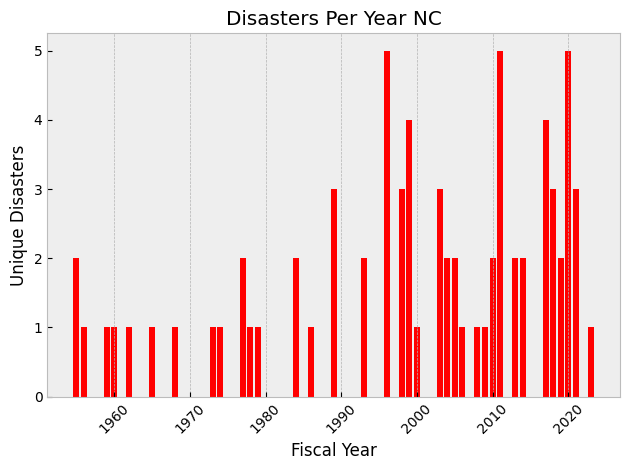

In [ ]:
import matplotlib.pyplot as plt

# Data
fy_declared = [1955, 1956, 1959, 1960, 1962, 1965, 1968, 1973, 1974, 1977, 1978, 1979, 1984, 1986, 1989, 1993, 1996,
               1998, 1999, 2000, 2003, 2004, 2005, 2006, 2008, 2009, 2010, 2011, 2013, 2014, 2017, 2018, 2019, 2020,
               2021, 2023]
disaster_count = [2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 3, 2, 5, 3, 4, 1, 3, 2, 2, 1, 1, 1, 2, 5, 2, 2, 4, 3, 2, 5, 3, 1]

# Create the bar chart
plt.bar(fy_declared, disaster_count, color='red')

# Add labels and title
plt.xlabel('Fiscal Year')
plt.ylabel('Unique Disasters')
plt.title('Disasters Per Year NC')

# Show the plot
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

This bar chart shows the number of unique disasters decalred in North Carolina between 1955-2023. The past two decades 2000-2020 show higher number of disasters decalred compared to previous decades.

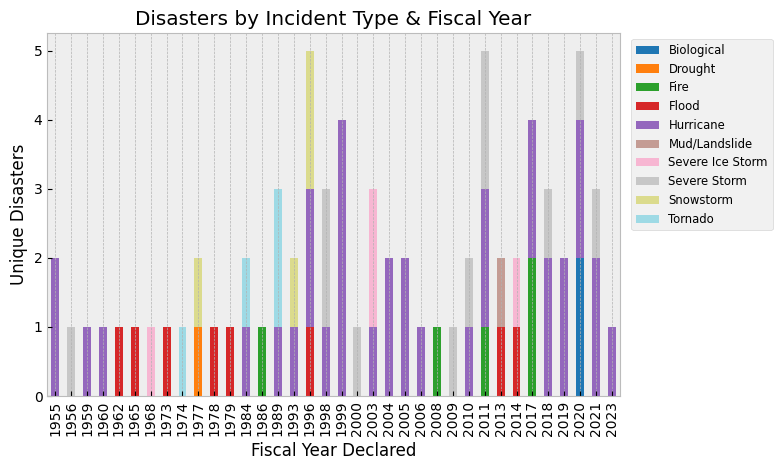

In [ ]:
import matplotlib.pyplot as plt

# Group by 'fyDeclared' and 'incidentType', and count the number of unique disasters within each group
disasters_by_fy_incident = new_df1.groupby(['fyDeclared', 'incidentType'])['disasterNumber'].nunique()

# Reshape the data to have 'fyDeclared' as rows and 'incidentType' as columns
disasters_by_fy_incident = disasters_by_fy_incident.unstack()

# Create the bar chart
disasters_by_fy_incident.plot(kind='bar', stacked=True, colormap='tab20')

# Add labels and title
plt.xlabel('Fiscal Year Declared')
plt.ylabel('Unique Disasters')
plt.title('Disasters by Incident Type & Fiscal Year')

# Show the plot
plt.grid(axis='y')
plt.tight_layout()  # Adjust layout to prevent clipping of labels

# Decrease the size of the legend
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', fontsize='small')

plt.show()

This plot builds on the previous to showcase the type and frequency of disasters in North Carolina across years. We see hurricanes and severe storms featuring regularly. What's also noticeable is that there are many years where more than one hurricane has occurred.


**Problem: We need to understand/predict what form of property mitigation action is likely across a wide range of ownership criteria, damage category, type of property, structure and residency in North Carolina.**

I will make a decision tree with the following values:

Target: To assess the probability of propertyAction

Features: structure type, damage category, typesofResidence, ownership

Object: property

In [ ]:
#SHOW DATAFRAME
north_carolina_data. head (3)

,projectIdentifier,programArea,programFy,disasterNumber,propertyAction,structureType,typeOfResidency,foundationType,county,city,state,stateNumberCode,region,zip,damageCategory,actualAmountPaid,numberOfProperties,id,totalAmountPaid
2,DR-1292-0057-R,HMGP,1999,1292.0,Acquisition/Demolition,Single Family,Rental,Crawl Space,Pender,BURGAW,North Carolina,37.0,4.0,28425,0 - 49%,167500.0,1,bd71e943-0609-442f-9a2a-9aaa3be7900b,857007369.0
15,DR-1292-0002-R,HMGP,1999,1292.0,Acquisition/Demolition,Single Family,Rental,Crawl Space,Lenoir,KINSTON,North Carolina,37.0,4.0,28501,50 - 99%,20000.0,1,355068b7-3399-45f4-9129-82d56de1e31e,857007369.0
202,DR-4019-0023-R,HMGP,2011,4019.0,Elevation,Single Family,Owner Occupied - Principal Residence,Crawl Space,Haywood,CANTON,North Carolina,37.0,4.0,28716,0 - 49%,54675.0,1,3a7a6d27-b028-4029-bb60-6b3cb1cf2a23,12512063.0


In [ ]:
# Drop NaNs from the data
north_carolina_data = north_carolina_data.dropna()

In [ ]:
#Sub-select columns
north_carolina_data1 = north_carolina_data[["foundationType", "structureType", "typeOfResidency", "propertyAction", "damageCategory", "id"]]


In [ ]:
# # -- create the features
feat = north_carolina_data1[["foundationType", "structureType", "typeOfResidency", "damageCategory"]]
feat

,foundationType,structureType,typeOfResidency,damageCategory
2,Crawl Space,Single Family,Rental,0 - 49%
15,Crawl Space,Single Family,Rental,50 - 99%
202,Crawl Space,Single Family,Owner Occupied - Principal Residence,0 - 49%
256,Crawl Space,Single Family,Rental,50 - 99%
378,Crawl Space,Single Family,Rental,0 - 49%
...,...,...,...,...
71311,Slab on Grade,2-4 Family,Owner Occupied - Principal Residence,50 - 99%
71383,"Elevated on Piers, Piles, Posts or Columns",Manufactured Home,Not Applicable,50 - 99%
71384,Crawl Space,Single Family,Not Applicable,50 - 99%
71387,Slab on Grade,Single Family,Not Applicable,50 - 99%


In [ ]:
#one hot encode
feat= pd.get_dummies(feat)

In [ ]:
_# # -- pull out the target variable
targ =north_carolina_data1["propertyAction"]
targ

2        Acquisition/Demolition
15       Acquisition/Demolition
202                   Elevation
256      Acquisition/Demolition
378      Acquisition/Demolition
                  ...          
71311    Acquisition/Demolition
71383    Acquisition/Demolition
71384    Acquisition/Demolition
71387    Acquisition/Demolition
71424    Acquisition/Demolition
Name: propertyAction, Length: 1118, dtype: object

In [ ]:
#split data model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
# Split the data into training and test sets
feat_train, feat_test, targ_train, targ_test = train_test_split(feat, targ, test_size=0.2, random_state=42)

In [ ]:
#fit a decision tree on the training data
dtc = DecisionTreeClassifier (random_state= 302)
dtc.fit(feat_train, targ_train)

DecisionTreeClassifier(random_state=302)

In [ ]:
#assess accuracy on the training data
pred_train = dtc.predict(feat_train)
accuracy_train= accuracy_score(targ_train, pred_train)
print("training accuracy)={0:.3f}".format(accuracy_train))

# #assess accuracy on the testing data
# pred_test = dtc.predict(feat_test)
# accuracy_test= accuracy_score(targ_test, pred_test)
# print("testing accuracy)={0:.3f}".format(accuracy_test))

training accuracy)=0.915


The training accuracy of 92.7 means that the decision tree classifier correctly predicted 92.7% of the labels in the training dataset. This indicates that the model performs well on the data it was trained on.

In [ ]:
#kfold validation
from sklearn.model_selection import cross_validate

In [ ]:
targ_train_value_counts = targ_train.value_counts()

It's worth nothing that we have a highly imbalanced dataset and it would influence the result.

In [ ]:
#run k-fold cross validate
cv_res = cross_validate(dtc, feat_train, targ_train, cv=5)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=5.



In [ ]:
#check teh results for consistence
cv_res

{'fit_time': array([0.00764608, 0.00602341, 0.00691867, 0.00639939, 0.0067389 ]),
 'score_time': array([0.0033648 , 0.00375819, 0.00361514, 0.00370026, 0.00362134]),
 'test_score': array([0.89385475, 0.89944134, 0.90502793, 0.91620112, 0.91011236])}

The array contains the scores obtained from cross-validation on the training data across different folds. Each score represents the accuracy of the model on the corresponding fold of the training data. Overall, these scores provide a measure of the model's performance across different subsets of the training data. The consistency of scores across folds indicates that the model's performance is relatively stable and generalizes well to different subsets of the data, which is a positive sign.

In [ ]:
#select paramter to tune and values range
tuned_parameters=[{"min_samples_leaf":range(1,100)}]

In [ ]:
# #modify hyperparameter
dtc_mod = DecisionTreeClassifier(min_samples_leaf=3)

#fit a decision tree on the training data
dtc = DecisionTreeClassifier(random_state=302)
dtc.fit(feat_train, targ_train)

#assess accuracy on the training data
pred_train = dtc.predict(feat_train)

accuracy_train= accuracy_score(targ_train, pred_train)
print("training accuracy={0:.3f}".format(accuracy_train))

training accuracy=0.915


The hyperparameter min_samples_leaf=3 didn't impact the model's performance compared to the default hyperparameters. It's possible that the default hyperparameters were already providing optimal or near-optimal performance. The model might not have been overfitting with the default hyperparameters, so adjusting them didn't lead to noticeable improvements in generalization performance.

In [ ]:
#fit all training data with hyperparameter value
dtc_mod.fit(feat_train, targ_train)

DecisionTreeClassifier(min_samples_leaf=3)

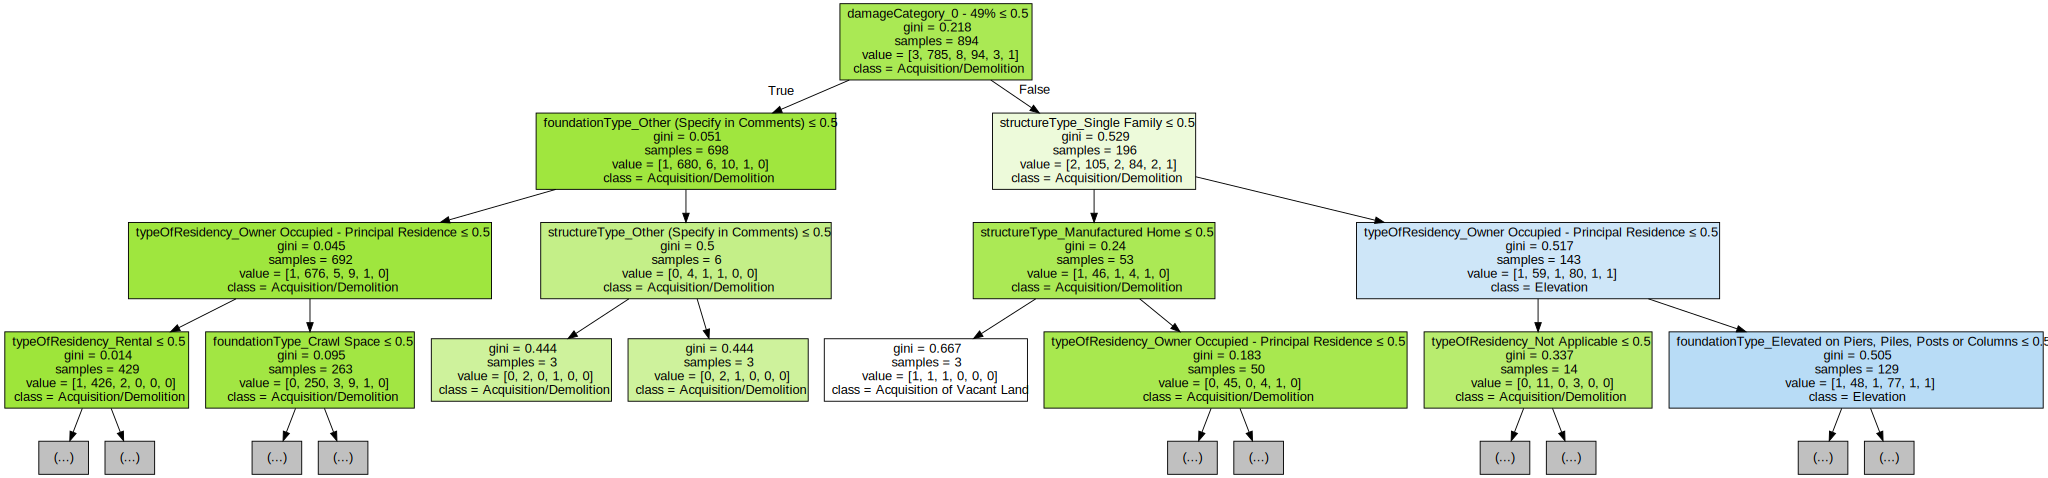

In [ ]:
# Visualise the tree
north_carolina_data1 = tree.export_graphviz(dtc_mod, out_file=None, filled=True, rounded=False,
                                special_characters=True, max_depth=3,
                                feature_names=feat_train.columns, class_names=dtc.classes_)
graph = graphviz.Source(north_carolina_data1)
graph

The decision tree visual above shows the distribution of Target, Property Action according to the four features selected: structure type, damage category, typesofResidence and foundation type of the ids in North Carolina.

The most important feature in the root node is damage category. It suggests that if the value of the feature "damageCategory_0" is less than or equal to 0.5, the left branch is followed, otherwise the right branch is followed. The resulting property action in acquisition.

Each value corresponds to the count of samples belonging to a specific class. In this case, its represent a multi-class scenario with 6 classes, where the counts are [4, 782, 9, 97, 1, 1] for each class respectively.

It carried Gini Impurity of 0.223 and shows the classsification of Property Action. The first split was performed on the basis of damage category followed by types of residency adn structure type.
Overall, this node in the decision tree is characterized by a relatively low Gini impurity, suggesting a reasonably homogenous distribution of classes. The majority class at this node is "Acquisition/Demolition", which would be the predicted class for new instances that follow this path in the decision tree.


In [ ]:
# Fit the decision tree classifier
dtc_mod.fit(feat_train, targ_train)

# Get feature importances
feature_importances = dtc_mod.feature_importances_

# Create a DataFrame to display feature importances
importance_df = pd.DataFrame({'Feature': feat.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display feature importances
print(importance_df)

                                              Feature  Importance
18                             damageCategory_0 - 49%    0.679406
11                        structureType_Single Family    0.208691
15  typeOfResidency_Owner Occupied - Principal Res...    0.056369
7                     structureType_Manufactured Home    0.020115
13                     typeOfResidency_Not Applicable    0.012776
3          foundationType_Other (Specify in Comments)    0.010538
2   foundationType_Elevated on Piers, Piles, Posts...    0.006072
1                          foundationType_Crawl Space    0.004045
17                             typeOfResidency_Rental    0.001064
20                            damageCategory_50 - 99%    0.000612
6                            structureType_2-4 Family    0.000287
19                                damageCategory_100%    0.000027
14        typeOfResidency_Other (Specify in Comments)    0.000000
16  typeOfResidency_Owner Occupied - Secondary Res...    0.000000
0         

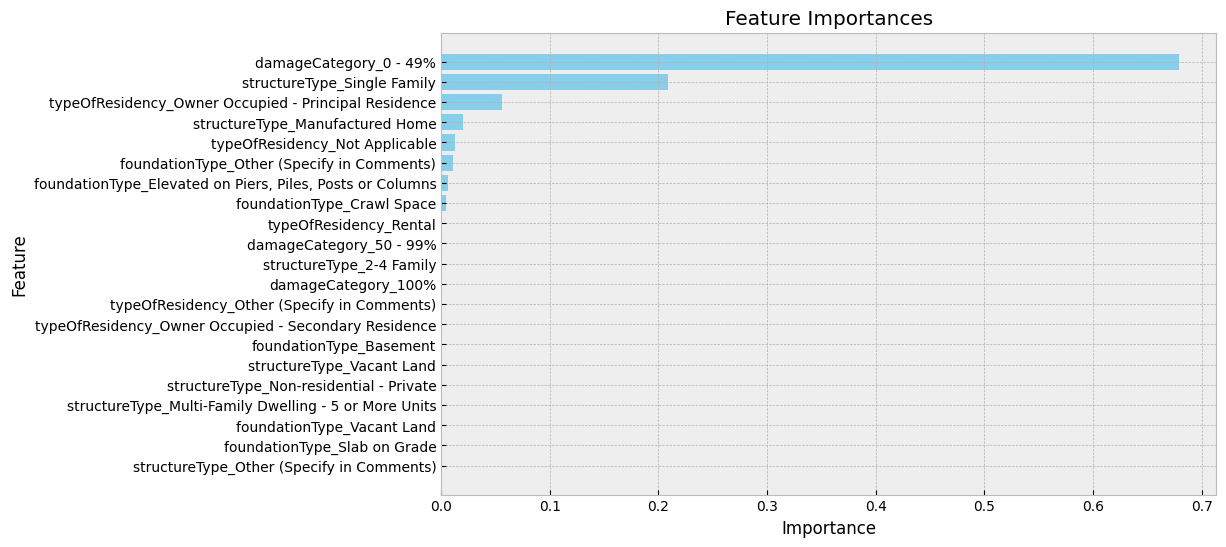

In [ ]:
import matplotlib.pyplot as plt

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important features at the top
plt.show()

In [ ]:
#import helpers function from skcit learn
from sklearn.model_selection import GridSearchCV

In [ ]:
#Select the parameters to tune
tuned_parameters= [{"min_samples_leaf": [1,2,5,10,50,100]}]

In [ ]:
#perform grid search
dtc_tune = DecisionTreeClassifier()
cv_tune= GridSearchCV(dtc_tune, tuned_parameters)
cv_tune.fit (feat_train, targ_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=5.



GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid=[{'min_samples_leaf': [1, 2, 5, 10, 50, 100]}])

In [ ]:
#print parameters with the highest score
cv_tune.best_params_["min_samples_leaf"]

10

In [ ]:
#define classifier
dtc_mod = DecisionTreeClassifier(min_samples_leaf=cv_tune.best_params_["min_samples_leaf"])

# #fit a decision tree on the training data
dtc = DecisionTreeClassifier()
dtc.fit(feat_train, targ_train)
#assess accuracy on the training data
pred_train = dtc.predict(feat_train)

accuracy_train= accuracy_score(targ_train, pred_train)
print("training accuracy)={0:.3f}".format(accuracy_train))

#assess accuracy on the testing data
pred_test = dtc.predict(feat_test)
accuracy_test= accuracy_score(targ_test, pred_test)
print("testing accuracy)={0:.3f}".format(accuracy_test))

training accuracy)=0.915
testing accuracy)=0.906


The training and testing accuracy is 91.5 and 90.6 respectively. There is a marginal difference between them. The model accuracy of 90.6 means that the decision tree classifier correctly predicted 90.0% of the labels in the testing dataset. This accuracy score reflects the model generalizes to new, unseen data with high level of accuracy. Overall, the model appears to perform well on the testing datasets, as indicated by the high accuracy scores.

In [ ]:
# Get the index of the feature used for the first split
root_feature_index = dtc.tree_.feature[0]

# Get the name of the feature used for the first split
root_feature_name = feat.columns[root_feature_index]

print("Feature used for the first split (root node):", root_feature_name)

Feature used for the first split (root node): damageCategory_0 - 49%


In [ ]:
from sklearn import tree
import graphviz

# Assuming 'dtc' is your DecisionTreeClassifier and 'feat' is your feature DataFrame
north_carolina_data1 = tree.export_graphviz(dtc, out_file=None, filled=True, rounded=False,
                                            special_characters=True, max_depth=3,
                                            feature_names=feat_train.columns, class_names=dtc.classes_)
graph = graphviz.Source(north_carolina_data1)

# Export the decision tree visualization as a PDF file
graph.render("decision_tree")

'decision_tree.pdf'

In [ ]:
#save file
graph.render("/content/drive/MyDrive/PhD_Anmol/DISA Independent Study Proposal (Anmol)/decision_tree")

'/content/drive/MyDrive/PhD_Anmol/DISA Independent Study Proposal (Anmol)/decision_tree.pdf'

In [ ]:
#modify hyperparameter
dtc_mod = DecisionTreeClassifier(min_samples_leaf=3)

#fit a decision tree on the testing data
dtc = DecisionTreeClassifier(random_state=302)
dtc.fit(feat_test, targ_test)

#assess accuracy on the training data
pred_test = dtc.predict(feat_test)

accuracy_train= accuracy_score(targ_test, pred_test)
print("testing accuracy)={0:.3f}".format(accuracy_test))

testing accuracy)=0.906


In [ ]:
# #calculate confusion matrix
from sklearn.metrics import confusion_matrix

In [ ]:
#Display the confusion matrix for test data for black
confusion_matrix(targ_test, pred_test)

array([[  1,   0,   0,   0],
       [  0, 188,   0,  12],
       [  0,   1,   0,   0],
       [  0,   5,   0,  17]])

Overall, the confusion matrix provides a detailed breakdown of the classifier's performance for each class, enabling a deeper understanding of its strengths and weaknesses in classification.

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

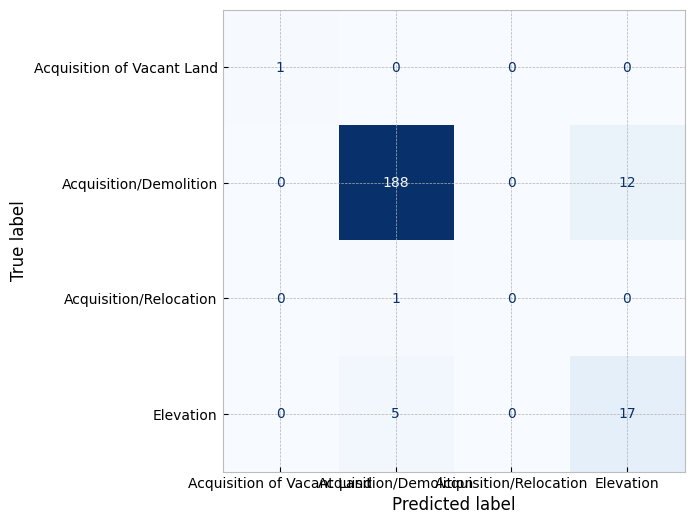

In [ ]:
# # Plot the confusion matrix using seaborn
fig,ax= plt.subplots(figsize=(6,6))
ConfusionMatrixDisplay.from_estimator(dtc, feat_test,targ_test, cmap= "Blues", colorbar=False, ax=ax)
fig.show ()

Class 0 seems to have the highest number of true positives (188), followed by class 1 (14), and then class 2 (0).
Class 0 also has the highest number of false negatives, with 5 instances predicted as class 1, and 1 instance predicted as class 2.
Class 1 has 9 false positives (instances from class 0 incorrectly classified as class 1).
Class 2 has 1 false positive (instance from class 0 incorrectly classified as class 2) and 1 false negative (instance from class 1 incorrectly classified as class 2).
Overall, the confusion matrix provides a detailed breakdown of the classifier's performance for each class, enabling a deeper understanding of its strengths and weaknesses in classification.

In [ ]:
from sklearn.metrics import precision_score, recall_score

In [ ]:
from sklearn.metrics import precision_score, recall_score

# Calculate precision and recall
prec = precision_score(targ_test, pred_test, average='weighted')
recall = recall_score(targ_test, pred_test, average='weighted')

print("Model precision: {:.2f}".format(prec))
print("Model recall: {:.2f}".format(recall))

Model precision: 0.93
Model recall: 0.92


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In this code, average='weighted' is used to calculate precision and recall considering the imbalance in class distribution. Adjust the averaging strategy based on your specific requirements.

The model's precision score is 0.93, which means that 93% of the predicted positive cases are actually positive.
The model's recall score is also 0.93, indicating that 93% of the actual positive cases are correctly identified by the model.
However, there is an "UndefinedMetricWarning" message, which suggests that precision is ill-defined for some labels with no predicted samples. This warning indicates that there are classes in the data for which the model did not make any positive predictions

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
#print the full classification report
print(classification_report(targ_test, pred_test))

                            precision    recall  f1-score   support

Acquisition of Vacant Land       1.00      1.00      1.00         1
    Acquisition/Demolition       0.97      0.94      0.95       200
    Acquisition/Relocation       0.00      0.00      0.00         1
                 Elevation       0.59      0.77      0.67        22

                  accuracy                           0.92       224
                 macro avg       0.64      0.68      0.66       224
              weighted avg       0.93      0.92      0.92       224



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.




**PRECISION**
For the class "Acquisition/Demolition", the precision is 0.97, indicating that 97% of the predicted cases labeled as "Acquisition/Demolition" are actually "Acquisition/Demolition".
For the class "Elevation", the precision is 0.58, meaning that 58% of the predicted cases labeled as "Elevation" are actually "Elevation".
For the class "Mitigation Reconstruction", the precision is 0.00, which means that there are no true positive predictions for this class.

**RECALL**
For the class "Acquisition/Demolition", the recall is 0.96, indicating that 96% of the actual cases labeled as "Acquisition/Demolition" are correctly identified by the model.
For the class "Elevation", the recall is 0.74, meaning that 74% of the actual cases labeled as "Elevation" are correctly identified by the model.
For the class "Mitigation Reconstruction", the recall is 0.00, which suggests that there are no true positive predictions for this class.

**ACCURACY**
Overall accuracy is 93%.


**Problem: There is a sense that disasters have become more severe and frequent over the years. It begs the question: Has mitigation funding also seen a commensurate increase over time? We examine the case of North Carolina**:

**Part II: Create a linear regression on North Carolina dataframe with the dependent variable Aid Received and the Independent variable Programme year.This allows us to explore the relationship between time and level of financial aid.**

In [ ]:
#show north carolina data
north_carolina_data. head (3)

,projectIdentifier,programArea,programFy,disasterNumber,propertyAction,structureType,typeOfResidency,foundationType,county,city,state,stateNumberCode,region,zip,damageCategory,actualAmountPaid,numberOfProperties,id,totalAmountPaid
2,DR-1292-0057-R,HMGP,1999,1292.0,Acquisition/Demolition,Single Family,Rental,Crawl Space,Pender,BURGAW,North Carolina,37.0,4.0,28425,0 - 49%,167500.0,1,bd71e943-0609-442f-9a2a-9aaa3be7900b,857007369.0
15,DR-1292-0002-R,HMGP,1999,1292.0,Acquisition/Demolition,Single Family,Rental,Crawl Space,Lenoir,KINSTON,North Carolina,37.0,4.0,28501,50 - 99%,20000.0,1,355068b7-3399-45f4-9129-82d56de1e31e,857007369.0
202,DR-4019-0023-R,HMGP,2011,4019.0,Elevation,Single Family,Owner Occupied - Principal Residence,Crawl Space,Haywood,CANTON,North Carolina,37.0,4.0,28716,0 - 49%,54675.0,1,3a7a6d27-b028-4029-bb60-6b3cb1cf2a23,12512063.0


In [ ]:
#Identify NaN values in actual amount paid
nan_values = north_carolina_data[north_carolina_data['actualAmountPaid'].isna()]
print(nan_values)

Empty DataFrame
Columns: [projectIdentifier, programArea, programFy, disasterNumber, propertyAction, structureType, typeOfResidency, foundationType, county, city, state, stateNumberCode, region, zip, damageCategory, actualAmountPaid, numberOfProperties, id, totalAmountPaid]
Index: []


In [ ]:
#drop NaN values
north_carolina_data = north_carolina_data.dropna(subset=['actualAmountPaid'])
north_carolina_data

,projectIdentifier,programArea,programFy,disasterNumber,propertyAction,structureType,typeOfResidency,foundationType,county,city,state,stateNumberCode,region,zip,damageCategory,actualAmountPaid,numberOfProperties,id,totalAmountPaid
2,DR-1292-0057-R,HMGP,1999,1292.0,Acquisition/Demolition,Single Family,Rental,Crawl Space,Pender,BURGAW,North Carolina,37.0,4.0,28425,0 - 49%,167500.0,1,bd71e943-0609-442f-9a2a-9aaa3be7900b,857007369.0
15,DR-1292-0002-R,HMGP,1999,1292.0,Acquisition/Demolition,Single Family,Rental,Crawl Space,Lenoir,KINSTON,North Carolina,37.0,4.0,28501,50 - 99%,20000.0,1,355068b7-3399-45f4-9129-82d56de1e31e,857007369.0
202,DR-4019-0023-R,HMGP,2011,4019.0,Elevation,Single Family,Owner Occupied - Principal Residence,Crawl Space,Haywood,CANTON,North Carolina,37.0,4.0,28716,0 - 49%,54675.0,1,3a7a6d27-b028-4029-bb60-6b3cb1cf2a23,12512063.0
256,DR-1292-0024-R,HMGP,1999,1292.0,Acquisition/Demolition,Single Family,Rental,Crawl Space,Edgecombe,BATTLEBORO,North Carolina,37.0,4.0,27809,50 - 99%,71216.0,1,bb7d9c86-348f-4e92-ba11-43388a5df04f,857007369.0
378,DR-1608-0005-R,HMGP,2006,1608.0,Acquisition/Demolition,Single Family,Rental,Crawl Space,Mecklenburg,CHARLOTTE,North Carolina,37.0,4.0,28208,0 - 49%,42652.0,1,597b387e-974b-4ba7-ab46-1206e8065080,354781.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71311,DR-4146-0004-R,HMGP,2013,4146.0,Acquisition/Demolition,2-4 Family,Owner Occupied - Principal Residence,Slab on Grade,Catawba,CLAREMONT,North Carolina,37.0,4.0,28610,50 - 99%,311667.0,1,d17d0478-9ab5-4e1b-a898-02d4035b1746,665722.0
71383,DR-1292-0040-R,HMGP,1999,1292.0,Acquisition/Demolition,Manufactured Home,Not Applicable,"Elevated on Piers, Piles, Posts or Columns",Pitt,GREENVILLE,North Carolina,37.0,4.0,27834,50 - 99%,2030.0,1,dfbabf92-d05b-4584-a00d-ab864d5ea15f,857007369.0
71384,DR-1292-0026-R,HMGP,1999,1292.0,Acquisition/Demolition,Single Family,Not Applicable,Crawl Space,Wayne,GOLDSBORO,North Carolina,37.0,4.0,27530,50 - 99%,100000.0,1,9547f746-ee28-429b-bf67-d241f794aff0,857007369.0
71387,DR-1292-0055-R,HMGP,1999,1292.0,Acquisition/Demolition,Single Family,Not Applicable,Slab on Grade,Lenoir,KINSTON,North Carolina,37.0,4.0,28504,50 - 99%,27000.0,2,fee87b70-cd0b-488f-a346-cdc631114938,857007369.0


In [ ]:
#create new dataframe with select columns
new_df = north_carolina_data[['programFy', 'actualAmountPaid']]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
#check sum of group value
new_df= new_df.groupby("programFy").sum()

# Reset index to make 'programFy' a column again
new_df = new_df.reset_index()

In [ ]:
#logdur for actual amoutn paid
new_df ["amount_log"]=np.log10(new_df["actualAmountPaid"])
new_df ["amount_log"]

0     8.068275
1     5.818297
2     6.932199
3     6.454820
4     5.363682
5     5.373010
6     7.014250
7     5.767033
8     6.421768
9     6.951835
10    6.089629
Name: amount_log, dtype: float64

In [ ]:
#standardise the data
new_df["programFy_st"]=(new_df["programFy"]- new_df["programFy"].mean())/new_df["programFy"].std ()
new_df["amount_std"]=(new_df["amount_log"]-new_df["amount_log"].mean())/new_df["amount_log"].std ()
new_df

,programFy,actualAmountPaid,amount_log,programFy_st,amount_std
0,1999,117024045.0,8.068275,-1.451837,2.052139
1,2000,658108.0,5.818297,-1.301175,-0.693823
2,2003,8554585.0,6.932199,-0.849188,0.665627
3,2004,2849836.0,6.454820,-0.698525,0.083014
4,2006,231037.0,5.363682,-0.397201,-1.248654
5,2010,236053.0,5.373010,0.205449,-1.237270
6,2011,10333570.0,7.014250,0.356111,0.765766
7,2013,584834.0,5.767033,0.657436,-0.756388
8,2014,2641000.0,6.421768,0.808098,0.042677
9,2017,8950239.0,6.951835,1.260085,0.689591


In [ ]:
# -- create the features
feat = new_df[["programFy_st"]]
feat

,programFy_st
0,-1.451837
1,-1.301175
2,-0.849188
3,-0.698525
4,-0.397201
5,0.205449
6,0.356111
7,0.657436
8,0.808098
9,1.260085


In [ ]:
# # -- pull out the target variable
targ =new_df["amount_std"]
targ

0     2.052139
1    -0.693823
2     0.665627
3     0.083014
4    -1.248654
5    -1.237270
6     0.765766
7    -0.756388
8     0.042677
9     0.689591
10   -0.362679
Name: amount_std, dtype: float64

In [ ]:
# # Split the data into training and test sets
feat_train, feat_test, targ_train, targ_test = train_test_split(feat, targ, test_size=0.2, random_state=42)

In [ ]:
#Plot 'totalAmountPaid' vs 'programFy' for North Carolina standardised
fig = px.scatter(new_df, x='programFy_st', y='amount_std',
                 title='Amount Paid Per Year NC Std',
                 labels={'programFy': 'Program Fiscal Year Std', 'logdur': 'Amount Paid Std'})

# Show the plot
fig.show()

The scatter plot shows standardised total house mitigation funds as Y variable received per year as X variable in North Carolina. The funding amount seems consistent over the years, however, there is one outlier year in 1999. This is quitelikely on account of Hurricane Floyd.

In [ ]:
from sklearn.linear_model import SGDRegressor
import plotly.express as px

In [ ]:
#redefine the model to use with SGD REGRESSOR
lm_st= SGDRegressor(random_state=302)

In [ ]:
#fit the standard line
lm_st.fit(feat_train, targ_train)

SGDRegressor(random_state=302)

In [ ]:
from sklearn.metrics import mean_squared_error

# Predict on the training data
pred_train = lm_st.predict(feat_train)
pred_train

array([-0.04641863, -0.05729253, -0.05946731, -0.04931833, -0.05511775,
       -0.05004326, -0.05656761, -0.05149312])

Each value in the pred_train array represents the model's prediction of the standardized target variable for a particular sample in the training data.
For example, the first value in the array (-0.04641863) is the model's prediction for the standardized target variable of the first sample in the training data.
Similarly, the second value (-0.05729253) corresponds to the model's prediction for the standardized target variable of the second sample in the training data, and so on.

In [ ]:
# Calculate Mean Squared Error (MSE)
mse_train = mean_squared_error(targ_train, pred_train)
print("Mean Squared Error on training data:", mse_train)

Mean Squared Error on training data: 0.4555436846675124


The MSE for training data is 0.45. It means that the model deviates from the actual data by 0.45 units.

In [ ]:
#kfold validation
from sklearn.model_selection import cross_validate

#run k-fold cross validate
cv_res = cross_validate(lm_st, feat_train, targ_train, cv=2)

#check teh results for consistence
cv_res

{'fit_time': array([0.00669551, 0.00629616]),
 'score_time': array([0.00495481, 0.00359344]),
 'test_score': array([-0.00543192, -0.12704822])}

In [ ]:
# Predict on the testing data
pred_test = lm_st.predict(feat_test)

In [ ]:
# Calculate Mean Squared Error (MSE)
mse_test = mean_squared_error(targ_test, pred_test)
print("Mean Squared Error on testing data:", mse_test)

Mean Squared Error on testing data: 2.1363558720797187


Overall, an MSE of 2.1364 suggests that, on average, the model's predictions have a squared difference of approximately 2.1364 from the actual values in the testing dataset.

In [ ]:
#predict the data based on linear regression
model_st = lm_st.predict(new_df[["programFy_st"]])
new_df["model_st"] = model_st
new_df

,programFy,actualAmountPaid,amount_log,programFy_st,amount_std,model_st
0,1999,117024045.0,8.068275,-1.451837,2.052139,-0.060192
1,2000,658108.0,5.818297,-1.301175,-0.693823,-0.059467
2,2003,8554585.0,6.932199,-0.849188,0.665627,-0.057293
3,2004,2849836.0,6.454820,-0.698525,0.083014,-0.056568
4,2006,231037.0,5.363682,-0.397201,-1.248654,-0.055118
5,2010,236053.0,5.373010,0.205449,-1.237270,-0.052218
6,2011,10333570.0,7.014250,0.356111,0.765766,-0.051493
7,2013,584834.0,5.767033,0.657436,-0.756388,-0.050043
8,2014,2641000.0,6.421768,0.808098,0.042677,-0.049318
9,2017,8950239.0,6.951835,1.260085,0.689591,-0.047144


In [ ]:
#visualise the data
new_df_fig = px.scatter(new_df, 'programFy_st', 'amount_std', title='Disaster Fund Years NC (std)',
                         labels={'programFy_st': 'Year', 'amount_std': 'Amount Received'},
                         color='actualAmountPaid', color_continuous_scale='viridis')
#creae a line plot
new_df_lmfig = px.line(new_df, 'programFy_st', 'model_st', labels={'programFy_st': 'Year', 'model_st': 'Linear Model'}, line_shape='linear')
new_df_fig.add_traces(new_df_lmfig.data)

#display figure
new_df_fig.show()

Overall, the scatter plot shows the mitigation amount recevied by NC between 1995-2018. The regression line shows that the amount paid to North Carolina has not increased over the past 23 years. The line deviates from the distribution of points and suggests that the linear model is not a good fit for the data. Overall, we can say that the relationship between mitigation amount paid and programme year is weak.

This scatter plot demonstrates the relationship between the dependent variable Actual Amount Paid and the independent variable Program Year in North Carolina. Additionally, it overlays a line plot representing the linear regression model fitted to the data. This line represents the relationship between 'programFy' (Year) and 'logdur' (Actual Amount Paid) as predicted by the linear regression model.

Each point on the scatter plot represents a pair of 'programFy' (Year) and  (Actual Amount Paid) values standardised.  The points are colored according to the 'logdur' values, with the color scale ranging from low to high values.

---
---

**Problem: The distribution of money varies over time from state to state, but we don't have a clear understanding of these groupings and divisions.**

**Part III: Create a Kmeans cluster of mitigation amount paid by State across years to find groups and clusters.**

In [ ]:
#show dataframe
mitigation. head (3)

,projectIdentifier,programArea,programFy,disasterNumber,propertyAction,structureType,typeOfResidency,foundationType,county,city,state,stateNumberCode,region,zip,damageCategory,actualAmountPaid,numberOfProperties,id
0,DR-1354-0005-R,HMGP,2001,1354.0,Safe Room/Wind Shelter,Single Family,NaN,Other (Specify in Comments),Saline,BENTON,Arkansas,5.0,6.0,07201,NaN,NaN,16,8daff339-bbc4-4dac-8f49-46b46e1dfaf4
1,DR-1428-0002-R,HMGP,2002,1428.0,Acquisition/Demolition,Single Family,Owner Occupied - Principal Residence,Crawl Space,Caledonia,LYNDONVILLE,Vermont,50.0,1.0,05851,50 - 99%,37058.0,1,48ddf3d9-d66e-43aa-9f22-68b6d2621574
2,DR-1292-0057-R,HMGP,1999,1292.0,Acquisition/Demolition,Single Family,Rental,Crawl Space,Pender,BURGAW,North Carolina,37.0,4.0,28425,0 - 49%,167500.0,1,bd71e943-0609-442f-9a2a-9aaa3be7900b


In [ ]:
#create a new dataframe with features
mitigation_new= mitigation[["programFy", "actualAmountPaid", "state"]]

In [ ]:
#drop nan
mitigation_new= mitigation_new.dropna(subset=["actualAmountPaid", "state", "programFy"])
mitigation_new

,programFy,actualAmountPaid,state
1,2002,37058.0,Vermont
2,1999,167500.0,North Carolina
3,2011,500.0,Mississippi
4,2011,93000.0,Pennsylvania
6,2004,10306.0,Florida
...,...,...,...
71711,2013,182658.0,Colorado
71713,2004,11220.0,Florida
71714,2013,1837.0,Oklahoma
71715,2006,2708.0,Florida


In [ ]:
#make state as index of dataframe
mitigation_new.set_index('state', inplace=True)

In [ ]:
#revise data frame for time series
mitigation_time = mitigation_new.pivot_table(index='state', columns='programFy', values='actualAmountPaid', aggfunc='sum')

# Fill NaN values with 0
mitigation_time.fillna(0, inplace=True)

# Print the resulting DataFrame
mitigation_time. head (5)

programFy,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
state,,,,,,,,,,,,,,,,,,,,,
Alabama,0.0,0.0,0.0,667403.0,568896.0,253500.0,32276.0,3502531.0,13706772.0,32007068.0,...,726595.0,0.0,6337715.0,0.0,1962407.0,0.0,1789907.0,415657.0,178108.0,0.0
Alaska,0.0,0.0,0.0,0.0,738900.0,0.0,61896.0,596584.0,0.0,95042.0,...,96454.0,5331009.0,312034.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Arizona,0.0,0.0,0.0,0.0,0.0,843215.0,266767.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Arkansas,0.0,0.0,0.0,334416.0,0.0,64737837.0,101813.0,1391821.0,3974112.0,0.0,...,0.0,266789.0,1029106.0,1987379.0,742486.0,1006614.0,0.0,116099.0,0.0,0.0
California,0.0,0.0,0.0,0.0,318182.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1829580.0,889058.0,0.0,3800330.0,1264240.0,0.0,0.0,0.0


In [ ]:
import plotly.graph_objects as go

# Extracting the data from the DataFrame
data = mitigation_time.values

# Define the layout
layout = go.Layout(
    title="FEMA Mitigation Funds Timeseries Heatmap",
    xaxis=dict(title="Year"),
    yaxis=dict(title="State"),
    coloraxis=dict(colorbar=dict(title="Mitigation Time", dtick=500), colorscale="viridis", cmin=0, cmax=600),
    height=700  # Adjust the height of the plot to make more space for the y-axis labels
)
# Create the heatmap
heatmap = go.Figure(data=go.Heatmap(z=data, x=mitigation_time.columns, y=mitigation_time.index), layout=layout)

# Show the heatmap
heatmap.show()

The heatmap provides basic ideas about how the states have received mitigation funds over the years by FEMA. We can surmise that most of states have received funds in tune of 0-0.5 billion across the years.

Washington and Missouri stand out for receiving 1.64 billion and 2.29 billion $ grants. Like our previous visuals, we see confirmation that North Carolina received 857 million grant in 1999 on account of a hurricane. We also see that no state has consistently received high grants upwards of 1 billion consistently over the years.  

In [ ]:
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler

# Standardize the values across features (years)
scaler = StandardScaler()
mitigation_time_std = scaler.fit_transform(mitigation_time)

# Convert the standardized array to a DataFrame
mitigation_time_scaled = pd.DataFrame(mitigation_time_std, index=mitigation_time.index, columns=mitigation_time.columns)

# Display the DataFrame with standardized values
mitigation_time_scaled. head (3)

programFy,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
state,,,,,,,,,,,,,,,,,,,,,
Alabama,-0.140028,-0.255172,-0.164311,-0.203219,-0.140232,-0.269273,-0.321881,-0.077783,0.421320,0.913030,...,0.120101,-0.233125,0.176314,-0.153397,0.148488,-0.143595,1.908464,-0.032342,0.453970,-0.140028
Alaska,-0.140028,-0.255172,-0.164311,-0.207133,-0.138637,-0.272606,-0.315711,-0.156405,-0.197767,-0.232489,...,-0.376908,-0.046909,-0.170263,-0.153397,-0.291389,-0.143595,-0.367268,-0.322367,-0.257176,-0.140028
Arizona,-0.140028,-0.255172,-0.164311,-0.207133,-0.145570,-0.261522,-0.273032,-0.172545,-0.197767,-0.235901,...,-0.452984,-0.233125,-0.188211,-0.153397,-0.291389,-0.143595,-0.367268,-0.322367,-0.257176,-0.140028


In [ ]:
import plotly.graph_objects as go

# Define the layout
layout = go.Layout(
    title="FEMA Mitigation Funds Timeseries Heatmap (Standardized)",
    xaxis=dict(title="Year"),
    yaxis=dict(title="State"),
    coloraxis=dict(colorbar=dict(title="Standardized Mitigation Time", dtick=0.5), colorscale="viridis", cmin=-2, cmax=2),
    height=700
)
# Create the heatmap
heatmap = go.Figure(layout=layout)

# Add the heatmap trace
heatmap.add_trace(go.Heatmap(z=mitigation_time_scaled, x=mitigation_time.columns, y=mitigation_time.index))

# Show the heatmap
heatmap.show()

This heatmap tells a better story about mitigation fund distribution in the United States. The levels are much detailed and the time steps are better displayed. We can surmise that the majority of States have received similar hazard funds but there is some variation. For example, states like Wisconsin and Arizona are on the low spectrum of funds while  Mississippi has Oklahoma benefited from high levels of funding.

In [ ]:
# Convert column names to strings
mitigation_time_scaled.columns = mitigation_time_scaled.columns.astype(str)

In [ ]:
mitigation_time_scaled

programFy,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,...,2016,2017,2018,2019,2020,2021,Cluster,TotalMoneyReceived,TotalMoneyReceived_standardized,Mean_TotalMoneyReceived_standardized
state,,,,,,,,,,,,,,,,,,,,,
Alabama,-0.140028,-0.255172,-0.164311,-0.203219,-0.140232,-0.269273,-0.321881,-0.077783,0.421320,0.913030,...,0.148488,-0.143595,1.908464,-0.032342,0.453970,-0.140028,0,13.351377,1.389229,-2.135044e-17
Alaska,-0.140028,-0.255172,-0.164311,-0.207133,-0.138637,-0.272606,-0.315711,-0.156405,-0.197767,-0.232489,...,-0.291389,-0.143595,-0.367268,-0.322367,-0.257176,-0.140028,0,-5.071599,-0.544418,-2.135044e-17
Arizona,-0.140028,-0.255172,-0.164311,-0.207133,-0.145570,-0.261522,-0.273032,-0.172545,-0.197767,-0.235901,...,-0.291389,-0.143595,-0.367268,-0.322367,-0.257176,-0.140028,0,-6.411218,-0.685022,-2.135044e-17
Arkansas,-0.140028,-0.255172,-0.164311,-0.205172,-0.145570,0.578368,-0.307395,-0.134889,-0.018270,-0.235901,...,-0.124959,-0.140399,-0.367268,-0.241359,-0.257176,-0.140028,0,-4.737226,-0.509322,-2.135044e-17
California,-0.140028,-0.255172,-0.164311,-0.207133,-0.142584,-0.272606,-0.328605,-0.172545,-0.197767,-0.235901,...,-0.291389,-0.131529,1.240118,-0.322367,-0.257176,-0.140028,0,-4.718377,-0.507344,-2.135044e-17
Colorado,-0.140028,-0.255172,-0.164311,-0.196236,-0.145570,-0.270453,-0.328605,-0.172545,-0.197767,-0.235901,...,-0.291389,-0.143595,-0.367268,-0.322367,-0.257176,-0.140028,0,-5.633047,-0.603346,-2.135044e-17
Connecticut,-0.140028,-0.255172,-0.164311,-0.207133,-0.145570,-0.272606,-0.328605,-0.172545,-0.197767,-0.235901,...,-0.291389,-0.143595,-0.367268,0.117704,-0.257176,-0.140028,0,-4.154995,-0.448212,-2.135044e-17
Delaware,-0.140028,-0.255172,-0.164311,-0.207133,-0.145570,-0.272606,-0.328605,-0.151820,-0.197767,-0.235901,...,-0.291389,-0.143595,-0.367268,-0.322367,-0.257176,-0.140028,0,-6.450821,-0.689179,-2.135044e-17
District of Columbia,-0.140028,-0.255172,-0.164311,-0.207133,-0.145570,-0.272606,-0.328605,-0.172545,-0.197767,-0.235901,...,-0.291389,-0.143595,-0.367268,-0.322367,5.352281,-0.140028,0,-0.868418,-0.103258,-2.135044e-17


In [ ]:
kmeans = KMeans(n_clusters=4, random_state=42)

#Fit the model and predict clusters
clusters = kmeans.fit_predict(mitigation_time_scaled)

# Add cluster labels to the DataFrame
mitigation_time_scaled['Cluster'] = clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [ ]:
# -- make a scatter plot of the data
fig = px.scatter(mitigation_time_scaled, color="Cluster", color_continuous_scale=px.colors.qualitative.G10, opacity=0.4)

# Update layout to add axis labels and increase size
fig.update_layout(
    xaxis_title="State",
    yaxis_title="Funds Received",
    title="Scatter Plot with State-based Clusters",
    height=600,  # Set the height of the plot
    width=900    # Set the width of the plot
)
# Show the plot
fig.show()

The scatter plot shows that overwhelming majority of the state fall in Cluster 0 (49 states) wherein the mitigation funds are close to 0 (standardised). The three remaining clusters  have 1, 11 and 1 state respectively.

In [ ]:
#find labels
np.unique(kmeans.labels_, return_counts=True)

(array([0, 1, 2, 3], dtype=int32), array([49,  1,  1,  1]))

In [ ]:
# Create a new column 'TotalMoneyReceived' which contains the sum of money received by each state across years
mitigation_time_scaled['TotalMoneyReceived'] = mitigation_time_scaled.sum(axis=1)

programFy,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,...,2014,2015,2016,2017,2018,2019,2020,2021,Cluster,TotalMoneyReceived
state,,,,,,,,,,,,,,,,,,,,,
Alabama,-0.140028,-0.255172,-0.164311,-0.203219,-0.140232,-0.269273,-0.321881,-0.077783,0.421320,0.913030,...,0.176314,-0.153397,0.148488,-0.143595,1.908464,-0.032342,0.453970,-0.140028,0,13.351377
Alaska,-0.140028,-0.255172,-0.164311,-0.207133,-0.138637,-0.272606,-0.315711,-0.156405,-0.197767,-0.232489,...,-0.170263,-0.153397,-0.291389,-0.143595,-0.367268,-0.322367,-0.257176,-0.140028,0,-5.071599
Arizona,-0.140028,-0.255172,-0.164311,-0.207133,-0.145570,-0.261522,-0.273032,-0.172545,-0.197767,-0.235901,...,-0.188211,-0.153397,-0.291389,-0.143595,-0.367268,-0.322367,-0.257176,-0.140028,0,-6.411218
Arkansas,-0.140028,-0.255172,-0.164311,-0.205172,-0.145570,0.578368,-0.307395,-0.134889,-0.018270,-0.235901,...,-0.129020,-0.118067,-0.124959,-0.140399,-0.367268,-0.241359,-0.257176,-0.140028,0,-4.737226
California,-0.140028,-0.255172,-0.164311,-0.207133,-0.142584,-0.272606,-0.328605,-0.172545,-0.197767,-0.235901,...,-0.082979,-0.137592,-0.291389,-0.131529,1.240118,-0.322367,-0.257176,-0.140028,0,-4.718377
Colorado,-0.140028,-0.255172,-0.164311,-0.196236,-0.145570,-0.270453,-0.328605,-0.172545,-0.197767,-0.235901,...,-0.188211,-0.125313,-0.291389,-0.143595,-0.367268,-0.322367,-0.257176,-0.140028,0,-5.633047
Connecticut,-0.140028,-0.255172,-0.164311,-0.207133,-0.145570,-0.272606,-0.328605,-0.172545,-0.197767,-0.235901,...,-0.188211,-0.153397,-0.291389,-0.143595,-0.367268,0.117704,-0.257176,-0.140028,0,-4.154995
Delaware,-0.140028,-0.255172,-0.164311,-0.207133,-0.145570,-0.272606,-0.328605,-0.151820,-0.197767,-0.235901,...,-0.188211,-0.153397,-0.291389,-0.143595,-0.367268,-0.322367,-0.257176,-0.140028,0,-6.450821
District of Columbia,-0.140028,-0.255172,-0.164311,-0.207133,-0.145570,-0.272606,-0.328605,-0.172545,-0.197767,-0.235901,...,-0.188211,-0.153397,-0.291389,-0.143595,-0.367268,-0.322367,5.352281,-0.140028,0,-0.868418


In [ ]:
# Standardize the 'TotalMoneyReceived' column using z-score normalization
scaler = StandardScaler()
mitigation_time_scaled['TotalMoneyReceived_standardized'] = scaler.fit_transform(mitigation_time_scaled[['TotalMoneyReceived']])

In [ ]:
# Calculate the mean of TotalMoneyReceived_standardized
mean_TotalMoneyReceived_standardized = mitigation_time_scaled['TotalMoneyReceived_standardized'].mean()

# Create a new column with mean TotalMoneyReceived_standardized value
mitigation_time_scaled['Mean_TotalMoneyReceived_standardized'] = mean_TotalMoneyReceived_standardized

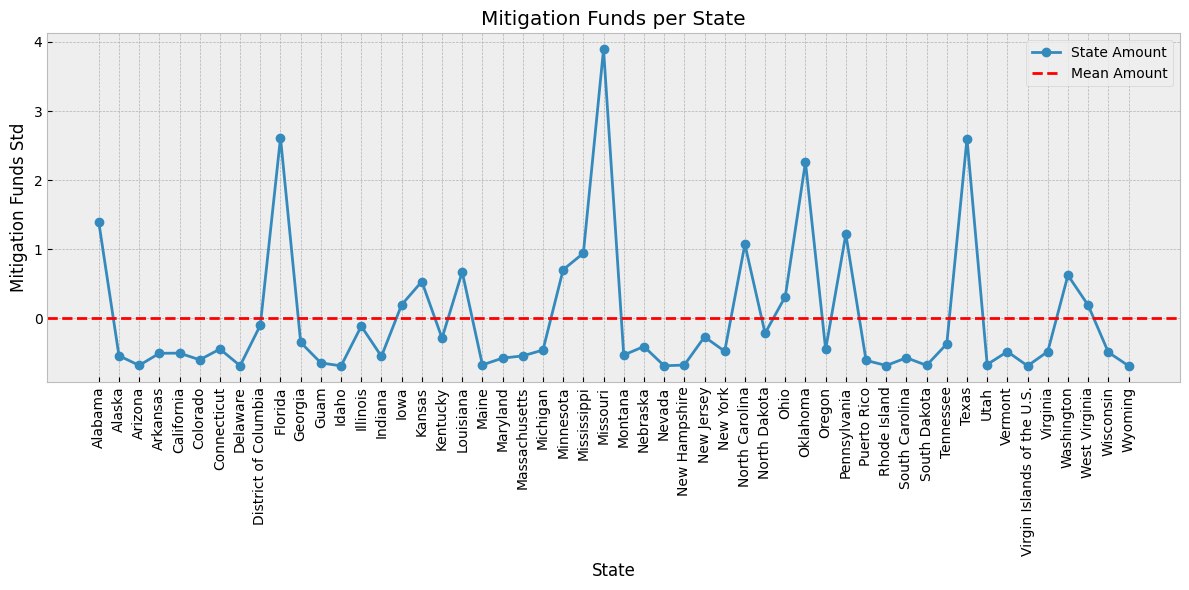

In [ ]:
import matplotlib.pyplot as plt

# Calculate the mean of TotalMoneyReceived_standardized
mean_standardized = mitigation_time_scaled['TotalMoneyReceived_standardized'].mean()

# Create a line plot
plt.figure(figsize=(12, 6))
plt.plot(mitigation_time_scaled.index, mitigation_time_scaled['TotalMoneyReceived_standardized'], marker='o', linestyle='-', label='State Amount')
plt.axhline(y=mean_TotalMoneyReceived_standardized, color='r', linestyle='--', label='Mean Amount')
plt.title('Mitigation Funds per State')
plt.xlabel('State')
plt.ylabel('Mitigation Funds Std')
plt.xticks(rotation=90)
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()

This plot compares the sum of mitigation funds received by each state across years standardised. The red line is the mean value of mitigation funds. We can see that the majority of states fall below the mean while states like Alabama, Florida, Missourri, Texas, etc. have received much greater funding. This showcases the variation in funding across states and raises policy questions allocation criterion.